In [121]:
from tensorflow import keras
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [123]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [124]:
X_train.shape

(60000, 28, 28)

2


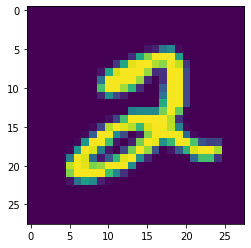

In [125]:
plt.imshow(X_train[5])
print(y_train[5])

In [126]:
y_train[2]

4

In [127]:
X_train = X_train/255
X_test = X_test/255

In [128]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(len(X_test), 28, 28, 1)

In [129]:
model = keras.Sequential([
    keras.layers.Conv2D(filters =32, kernel_size = 3, input_shape=(28,28,1), activation = 'relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(filters =28, kernel_size = 3,activation = 'relu'),
    keras.layers.MaxPool2D((2,2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(60, activation = 'relu'),
    keras.layers.Dropout(.5),
    keras.layers.Dense(15, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')

])

In [130]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = 'accuracy')

In [131]:
model.fit(X_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7754 - accuracy: 0.7443
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1803 - accuracy: 0.9460
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1236 - accuracy: 0.9635


In [132]:
y_pred = model.predict(X_test)

In [135]:
y_pred.shape


(10000, 10)

In [138]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0450 - accuracy: 0.9861


[0.04499903693795204, 0.9861000180244446]

In [140]:
def predict(index):
    input_image = plt.imshow(X_test[index])
    print(f'prediction: {np.argmax(y_pred[index])}')
    print(f'truth: {y_test[index]}')

prediction: 3
truth: 3


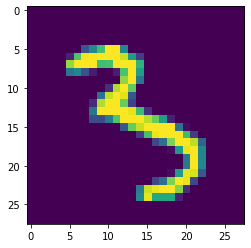

In [142]:
predict(569)